# COVID mortality rates per country

This is a naive analysis of the published  mortality rates for the COVID 19 pandemic.

- pull the data from a csv on github
- turn it into a Pandas DataFrame
- do some filtering and a couple of plots

I believe that **everyone** should be able to do this.
Doing basic data analysis should be  like  what reading and writing
was at the beginning of the 20th century - a basic skill 
taught to every child at school.

The data is published [here](https://github.com/CSSEGISandData/COVID-19)

**2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE**

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). 




In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the latest time series and save to disk

In [34]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)



# Parse them to a DataFrames

In [35]:
df = pd.read_csv('covid_deaths.csv')
dfc = pd.read_csv('covid_confirmed.csv')

In [95]:
dfc[140:145]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
140,NaN,Jordan,31.2400,36.5100,0,0,0,0,0,0,...,85,85,112,127,154,172,212,235,246,259
141,NaN,Kazakhstan,48.0196,66.9237,0,0,0,0,0,0,...,49,53,60,62,72,81,111,150,228,284
142,NaN,Kenya,-0.0236,37.9062,0,0,0,0,0,0,...,7,7,15,16,25,28,31,31,38,42
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,8652,8799,8961,8961,9037,9137,9241,9332,9478,9583
144,NaN,Kuwait,29.5000,47.7500,0,0,0,0,0,0,...,159,176,188,189,191,195,208,225,235,255


In [4]:
df[df["Country/Region"] == 'South Korea']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20


# Foyers

These are the hotspots for the pandemic
- I chose 300 because I can catch Germany like that

In [36]:
foyers = df[df[df.columns[-1]] > 300]
foyers

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,67,75,88,122,178,220,289,353,431,513
62,Hubei,China,30.9756,112.2707,17,17,24,40,52,76,...,3139,3153,3153,3160,3163,3169,3174,3177,3182,3186
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,562,674,860,1100,1331,1696,1995,2314,2606,3024
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,84,94,123,157,206,267,342,433,533,645
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,1556,1685,1812,1934,2077,2234,2378,2517,2640,2757
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,4825,5476,6077,6820,7503,8215,9134,10023,10779,11591
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,136,179,213,276,356,434,546,639,771,864
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,1375,1772,2311,2808,3647,4365,5138,5982,6803,7716
206,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,75,98,120,122,153,191,231,264,300,359
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,233,281,335,422,465,578,759,1019,1228,1408


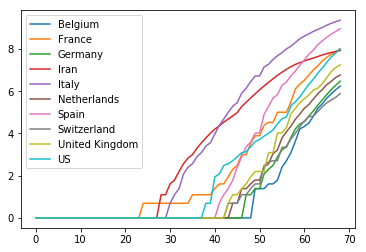

In [37]:
fig, ax = plt.subplots()
for x in foyers.index:
    if df.iloc[x]["Country/Region"] in ['China']: continue
    Y = np.log( df.iloc[x].values[4:].astype(np.float) + 1)
    ax.plot(np.arange(len(Y)),Y, label=df.iloc[x]["Country/Region"])

#ax.axis('equal')
leg = ax.legend();

so the graph shows log(deaths) 

In [38]:
x = df.iloc[116,4:].values
x[1:] - x[:-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 3,
       2, 8, 0, 14, 15, 0, 31, 12, 0, 57, 0, 0, 95, 207, 112, 112, 186,
       240, 231, 365, 299, 319, 292, 418], dtype=object)

# Compare Korea, Germany, Spain over the last 10 days

In [10]:
dfc.iloc[[143,120,201],-10:]

,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
143,8652,8799,8961,8961,9037,9137,9241,9332,9478,9583
120,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095
201,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110


# Linear regression

If a quantity is growing/decaying exponentially 
then by taking logs we should get a straignt line....

We can calculate the best fit straight line 
to the data by doing linear regression.



In [45]:
from scipy import stats


def lin_reg(mdf, indices, window = 10):
    X = []
    for c in indices:
        Y = mdf.iloc[c].values[ -window:].astype(np.float)
        # apply a cut off
        Y = np.log(Y[Y > 100])
        vv = stats.linregress(np.arange(len(Y)), Y)
        X.append((c, np.exp(vv.slope), np.exp(vv.intercept).astype(int) ))
    return X

## these are the results

In [52]:
ww = 20
cc = countries = [x for x in foyers.index if x != 62]

X = list(zip(* lin_reg(df,cc,window=ww)))
Z = list(zip(* lin_reg(dfc,cc,window=ww)))

X[2] = Z[1]
X[0] = [dfc.iloc[x]["Country/Region"] for x in X[0]]
dff = pd.DataFrame({'country' : X[0], 'deaths': X[1], 'confirmed': X[2]})
dff

,country,deaths,confirmed
0,Belgium,1.263566,1.209108
1,France,1.268952,1.172303
2,Germany,1.271658,1.206503
3,Iran,1.110775,1.077577
4,Italy,1.152613,1.118942
5,Netherlands,1.239114,1.185780
6,Spain,1.269912,1.207828
7,Switzerland,1.181308,1.188927
8,United Kingdom,1.233819,1.230369
9,US,1.301829,1.310900


Text(0.5,0,'confirmed cases growth rate')

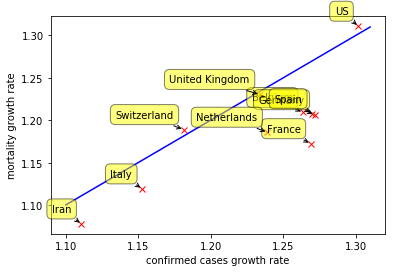

In [58]:
labels = dfc.iloc[cc]["Country/Region"]

for label, x, y in zip(dff['country'], dff['deaths'],dff['confirmed']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.plot(dff['deaths'],dff['confirmed'],'rx')
bx = [1.1,1.31]
plt.plot(bx,bx,'b')
plt.ylabel('mortality growth rate')
plt.xlabel('confirmed cases growth rate')

## Calculate rolling averages for some countries for the last 36 days


this was something somebody asked me to do for another problem
but it's a standard way of smoothing data.

In [13]:
df.iloc[cc,1]

116            France
137             Italy
120           Germany
143      Korea, South
201             Spain
223    United Kingdom
225                US
Name: Country/Region, dtype: object

In [15]:
start = -30
data = [df.iloc[nn , start:].rolling(5).sum() for nn in cc ]
filtered_data = [ x[x>0].values for x in data]

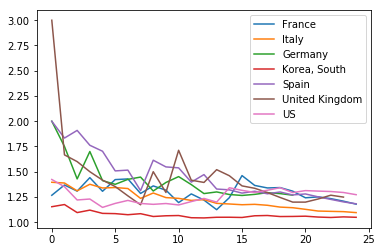

In [16]:
fig, ax = plt.subplots()
for x,label in zip(filtered_data, df.iloc[cc]["Country/Region"]):
    ax.plot( np.arange(len(x)-1), x[1:]/x[:-1], label=label)

leg = ax.legend();